In [1]:
import xarray as xr
import numpy as np
import pandas as pd

In [2]:
#input data of the four seasons pattern correlation
dir = '/home/m/m301036/josie/LSAT/1850-2100Analyses/SpatialPattern/patternCorrelation/'

SAT_corr_winter = xr.open_dataset(dir+'LSAT_corr_DJF_MPI-ESM.nc')
SAT_corr_spring = xr.open_dataset(dir+'LSAT_corr_MAM_MPI-ESM.nc')
SAT_corr_summer = xr.open_dataset(dir+'LSAT_corr_JJA_MPI-ESM.nc')
SAT_corr_autumn = xr.open_dataset(dir+'LSAT_corr_SON_MPI-ESM.nc')


In [3]:
SAT_corr_djf = SAT_corr_winter.to_array().values
type(SAT_corr_djf)

SAT_corr_mam = SAT_corr_spring.to_array().values
SAT_corr_jja = SAT_corr_summer.to_array().values
SAT_corr_son = SAT_corr_autumn.to_array().values

In [4]:
SLP_corr_winter = xr.open_dataset(dir+'SLP_corr_DJF_MPI-ESM.nc')
SLP_corr_spring = xr.open_dataset(dir+'SLP_corr_MAM_MPI-ESM.nc')
SLP_corr_summer = xr.open_dataset(dir+'SLP_corr_JJA_MPI-ESM.nc')
SLP_corr_autumn = xr.open_dataset(dir+'SLP_corr_SON_MPI-ESM.nc')

SLP_corr_winter, SLP_corr_spring, SLP_corr_summer, SLP_corr_autumn

(<xarray.Dataset>
 Dimensions:                        (run: 30)
 Dimensions without coordinates: run
 Data variables:
     __xarray_dataarray_variable__  (run) float64 ...,
 <xarray.Dataset>
 Dimensions:                        (run: 30)
 Dimensions without coordinates: run
 Data variables:
     __xarray_dataarray_variable__  (run) float64 ...,
 <xarray.Dataset>
 Dimensions:                        (run: 30)
 Dimensions without coordinates: run
 Data variables:
     __xarray_dataarray_variable__  (run) float64 ...,
 <xarray.Dataset>
 Dimensions:                        (run: 30)
 Dimensions without coordinates: run
 Data variables:
     __xarray_dataarray_variable__  (run) float64 ...)

In [5]:
SLP_corr_djf = SLP_corr_winter.to_array().values
SLP_corr_mam = SLP_corr_spring.to_array().values
SLP_corr_jja = SLP_corr_summer.to_array().values
SLP_corr_son = SLP_corr_autumn.to_array().values
SLP_corr_djf

array([[-0.37682027, -0.5349629 ,  0.39176266,  0.30227844,  0.18713311,
         0.30855548,  0.59974265, -0.46397319, -0.29876546,  0.3564727 ,
        -0.27792427, -0.47733327,  0.17541802,  0.06529977, -0.02030236,
         0.49219613, -0.28651452, -0.41161646,  0.34466418, -0.40157779,
        -0.04269701,  0.45385107,  0.3004036 , -0.160038  ,  0.5879287 ,
         0.05011435,  0.35037329,  0.19072075, -0.23155474,  0.36910794]])

In [6]:
CORR_DJF = np.corrcoef(SLP_corr_djf, SAT_corr_djf)[0,1]
CORR_MAM = np.corrcoef(SLP_corr_mam, SAT_corr_mam)[0,1]
CORR_JJA = np.corrcoef(SLP_corr_jja, SAT_corr_jja)[0,1]
CORR_SON = np.corrcoef(SLP_corr_son, SAT_corr_son)[0,1]
CORR_DJF, CORR_MAM, CORR_JJA, CORR_SON

(0.4698551532291239,
 0.43879934864698933,
 0.046935812908392785,
 0.286390689653571)

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


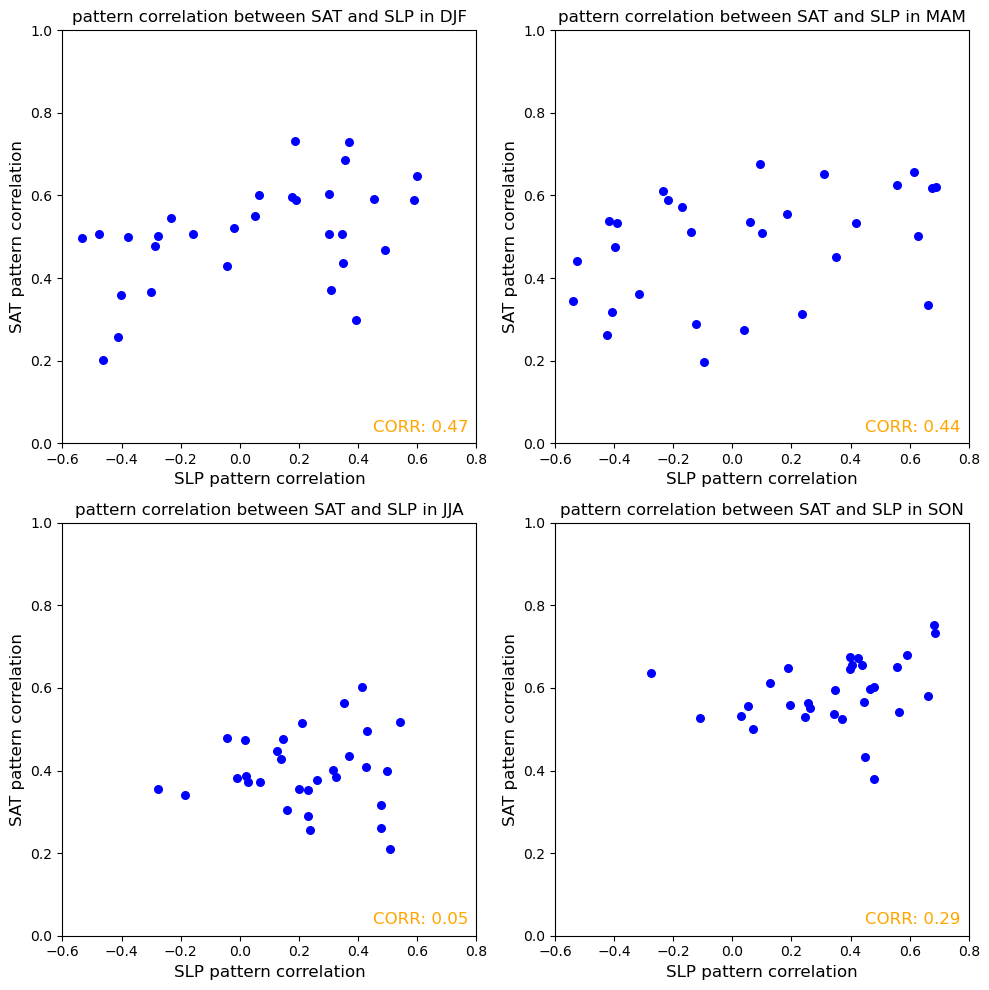

In [7]:
# draw the scatter plot of each seasons pattern correlation between SAT and SLP
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import cartopy.io.shapereader as shpreader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                                 AutoMinorLocator)


# define the function to draw the scatter plot in four subplot as four seasons
def draw_scatter_plot(ax, SLP_corr, SAT_corr, season, title):
    ax.scatter(SLP_corr, SAT_corr, s=30, c='b', marker='o')
    ax.set_xlabel('SLP pattern correlation', fontsize=12)
    ax.set_ylabel('SAT pattern correlation', fontsize=12)
    ax.set_title('pattern correlation between SAT and SLP in '+season, fontsize=12)
    ax.set_ylim(0.0, 1.0)
    ax.set_xlim(-0.6, 0.8)
    ax.text(0.98, 0.020, 'CORR: {:.2f}'.format(title), transform=ax.transAxes,ha='right', va='bottom', fontsize=12, fontdict={'family': 'cursive', 'color': 'orange', 'weight': 'normal', 'size': 8})


fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
draw_scatter_plot(axs[0, 0], SLP_corr_djf, SAT_corr_djf, 'DJF', CORR_DJF)
draw_scatter_plot(axs[0, 1], SLP_corr_mam, SAT_corr_mam, 'MAM', CORR_MAM)
draw_scatter_plot(axs[1, 0], SLP_corr_jja, SAT_corr_jja, 'JJA', CORR_JJA)
draw_scatter_plot(axs[1, 1], SLP_corr_son, SAT_corr_son, 'SON', CORR_SON)
plt.tight_layout()
plt.savefig('SLP_SAT_patternCorrelation_MPI-ESM.png', bbox_inches='tight', dpi=300)

plt.show()
